In [2]:
# for QR codes use inline
# %matplotlib inline
# qr_setting = 'url'
# qrviz_setting = 'show'
#
# for lecture use notebook
%matplotlib inline
qr_setting = None
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML;

# Analytic Geometry in $\mathbb{R}^n$

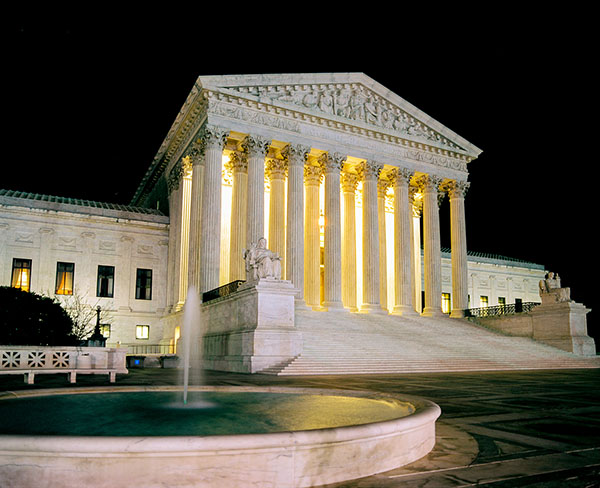

In [7]:
# image credit: https://www.supremecourt.gov/about/photos.aspx
display(Image("images/SC-night.jpg", width=350))

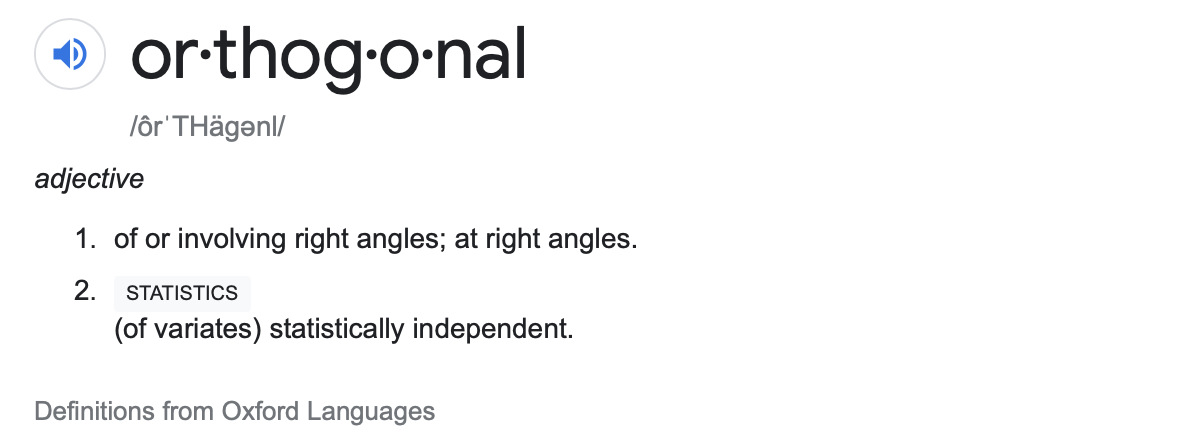

In [8]:
# image credit: Google
display(Image("images/orthogonal-def.png", width=850))

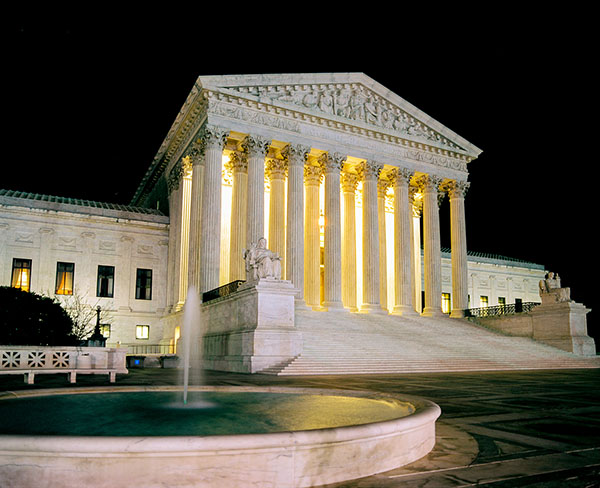

In [4]:
# image credit: https://www.supremecourt.gov/about/photos.aspx
display(Image("images/SC-night.jpg", width=350))
display(HTML("The Supreme Court of the United States"))

Transcript of oral arguments before the US Supreme Court, _Briscoe v. Virginia,_ January 11, 2010:

_MR. FRIEDMAN: I think that issue is entirely __orthogonal__ to the issue here because the Commonwealth is acknowledging –_

_CHIEF JUSTICE ROBERTS: I’m sorry. Entirely what?_

_MR. FRIEDMAN: __Orthogonal. Right angle. Unrelated. Irrelevant.___

_CHIEF JUSTICE ROBERTS: Oh._

_JUSTICE SCALIA: What was that adjective? I liked that._

_MR. FRIEDMAN: __Orthogonal.___

_CHIEF JUSTICE ROBERTS: __Orthogonal.___

_MR. FRIEDMAN: Right, right._

_JUSTICE SCALIA: __Orthogonal,__ ooh._

_(Laughter.)_

_JUSTICE KENNEDY: I knew this case presented us a problem._

_(Laughter.)_

## The Challenge: Extending Intuition to High Dimension

Our challenge today is to begin to lay down the elements of __analytic geometry__.

The concepts we deal with today will be familiar to you.   

Our goal is not to introduce new ideas, but to cast old ideas into greater __generality.__

In particular, we will take familiar notions and reformulate them in terms of vectors ...

... vectors in __arbitrary__ dimension.

Let's start with a simple example in $\mathbb{R}^n$.

How would your determine the angle $\theta$ below?

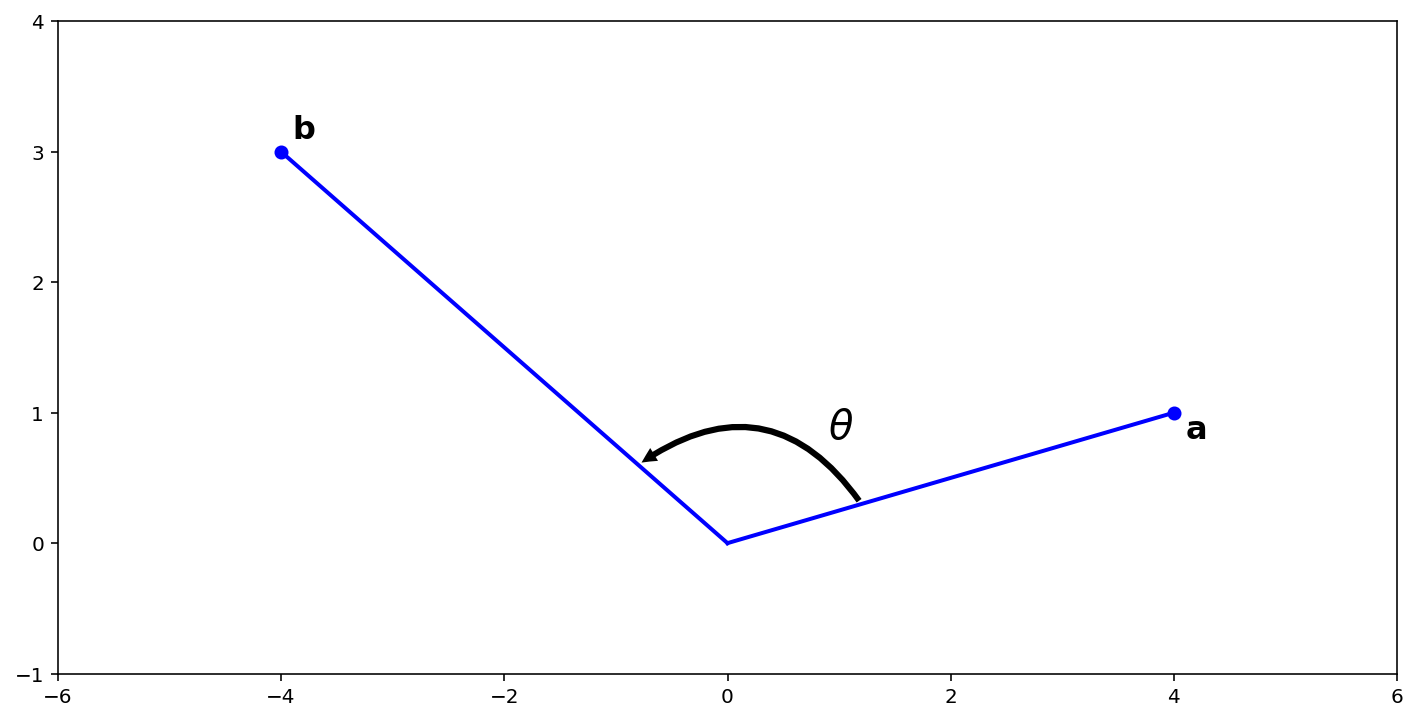

In [15]:
ax = ut.plotSetup(-6,6,-1,4,(12,6))
u = np.array([4.,1])
v = np.array([-4.,3])
pt = u + v

plt.plot([0,u[0]],[0,u[1]],'b-',lw=2)
plt.plot([0,v[0]],[0,v[1]],'b-',lw=2)
plt.plot(u[0], u[1], 'bo')
plt.plot(v[0], v[1], 'bo')
m = (u-v)/2.0
mm = v + m
ax.text(u[0]+.1, u[1]-.2 ,r'${\bf a}$',size=16)
ax.text(v[0]+.1, v[1]+.1, r'${\bf b}$',size=16)
ax.annotate('', xy=(0.2*v[0], 0.2*v[1]),  xycoords='data',
                xytext=(0.3*u[0], 0.3*u[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=0.5'},
                )
ax.text(0.9,0.8,r'$\theta$',size=20);

This is fairly easy.   Probably we'd take out a protractor and use it to measure $\theta$.

OK, let's go up one dimension, to $\mathbb{R}^3$.

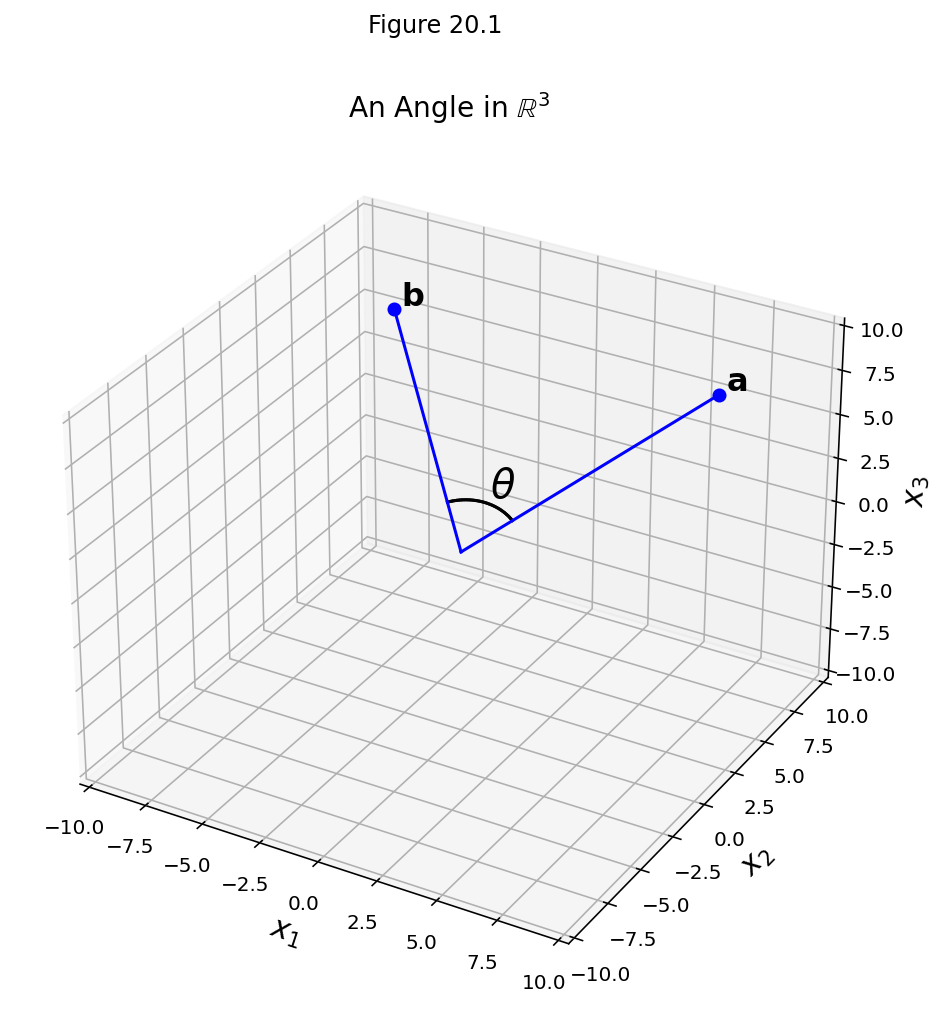

In [76]:
fig = ut.three_d_figure((20, 1), fig_desc = 'An Angle in R3',
                        xmin = -10, xmax = 10, ymin = -10, ymax = 10, zmin = -10, zmax = 10, 
                        figsize = (8, 8), qr = qr_setting)
x = np.array([7, -7]) 
y = np.array([7, 7]) 
z = np.array([7, 7]) 
arc_x = 1/5 * x
arc_y = 1/5 * y
arc_z = 1/5 * z
#
pts = np.column_stack([x, y, z])
arc_pts = np.column_stack([arc_x, arc_y, arc_z])
origin = np.array([0, 0, 0])
#
# linearly interpolate a set of points between arc[0] and arc[1]

def three_d_arc(pt1, pt2, nsteps):
    len0 = np.linalg.norm(pt1)
    len1 = np.linalg.norm(pt2)
    interp_pts = np.linspace(pt1, pt2, nsteps)
    interp_len = np.linspace(len0, len1, nsteps)
    interp_pts = np.array([x / (np.linalg.norm(x)/l) for x, l in zip(interp_pts, interp_len)])
    return interp_pts

nsteps = 30
arc_pts = three_d_arc(arc_pts[0], arc_pts[1], nsteps)
for p1, p2 in zip(arc_pts[:-1], arc_pts[1:]):
    fig.plotLine(np.array([p1, p2]), 'k')
#
fig.plotLine(np.array([origin, pts[0]]), 'b')
fig.plotPoint(x[0], y[0], z[0], 'b')
fig.text(x[0]+.2, y[0]+.2, z[0]+.2, r'${\bf a}$', 'e1', size=16)
#
fig.plotLine(np.array([origin, pts[1]]), 'b')
fig.plotPoint(x[1], y[1], z[1], 'b')
fig.text(x[1]+.2, y[1]+.2, z[1]+.2, r'${\bf b}$', 'e2', size=16)
#
mid = nsteps//2
fig.text(arc_pts[mid, 0]+.2, arc_pts[mid, 1]+.2, arc_pts[mid, 2]+.2, r'$\theta$', 'theta', size = 20)
#
fig.set_title(r'An Angle in $\mathbb{R}^3$', size=14);
fig.save();

This seems a little more challenging, but we could probably do it.

Let's go up one dimension, to $\mathbb{R}^4$:

This seems hard!

Today we'll start to bring __geometry__ to center stage in our discussion.

We'll concern ourselves with simple notions:  
* length, 
* distance, 
* orthogonality (perpendicularity), and 
* angle.  

However we will take these notions that are familiar from our 3D world and see how to define them for spaces of arbitrary dimension, ie, $\mathbb{R}^n$.

Interestingly, it turns out that these notions (length, distance, purpendicularity, angle) __all__ depend on one key notion: the __inner product__.  

In fact, the notion is so important that we refer to a vector space for which there is an inner product as an __inner product space.__

So let's briefly return to and review the __inner product.__

## Inner Product (Review)

Recall that we consider vectors such as $\mathbf{u}$ and $\mathbf{v}$ in $\mathbb{R}^n$ to be $n\times1$ matrices.  

Then $\mathbf{u}^T\mathbf{v}$ is a scalar, called the __inner product__ of $\mathbf{u}$ and $\mathbf{v}.$

You will also see this called the __dot product__.   It sometimes written as $\mathbf{u} \mathbf{\cdot} \mathbf{v}$ but we will always write  $\mathbf{u}^T\mathbf{v}.$

The inner product is the sum of the componentwise product of $\mathbf{u}$ and $\mathbf{v}$.

If $\mathbf{u} = \begin{bmatrix}u_1\\u_2\\\vdots\\u_n\end{bmatrix}$ and $\mathbf{v} = \begin{bmatrix}v_1\\v_2\\\vdots\\v_n\end{bmatrix},$ then the inner product of $\mathbf{u}$ and $\mathbf{v}$ is:

$$\mathbf{u}^T\mathbf{v} = \begin{bmatrix}u_1&u_2&\dots&u_n\end{bmatrix}\begin{bmatrix}v_1\\v_2\\\vdots\\v_n\end{bmatrix} = u_1v_1 + u_2v_2 + \dots + u_nv_n = \sum_{i=1}^n u_iv_i.$$

Let's remind ourselves of the properties of the inner product:

__Theorem.__  Let $\mathbf{u}$,$\mathbf{v}$, and $\mathbf{w}$ be vectors in $\mathbb{R}^n$, and let $c$ be a scalar.  Then:

1. $\mathbf{u}^T\mathbf{v} = \mathbf{v}^T\mathbf{u}$

Inner product is symmetric.  Note that these two expressions are the transpose of each other -- but of course the transpose of a scalar is itself!

2. $(\mathbf{u}+\mathbf{v})^T\mathbf{w} = \mathbf{u}^T\mathbf{w} + \mathbf{v}^T\mathbf{w}$
3. $(c\mathbf{u})^T\mathbf{v} = c(\mathbf{u}^T\mathbf{v}) = \mathbf{u}^T(c\mathbf{v})$

Inner product is __linear__ in __each term.__

4. $\mathbf{u}^T\mathbf{u} \geq 0,\;\;\;\mbox{and}\;\mathbf{u}^T\mathbf{u} = 0\;\mbox{if and only if}\;\mathbf{u} = 0$

Inner product of a vector with itself is __never negative.__

The first three are restatements of facts about matrix-vector products.

The last one is straightforward, but important.

Now, given that review, let's start talking about geometry.

## Vector Norm

OK, armed with the inner product, let's get started.

Our first question will be: How do we measure the __length__ of a vector?

Let's say we are in $\mathbb{R}^2$.  Then the length follows directly from the Pythagorean theorem:

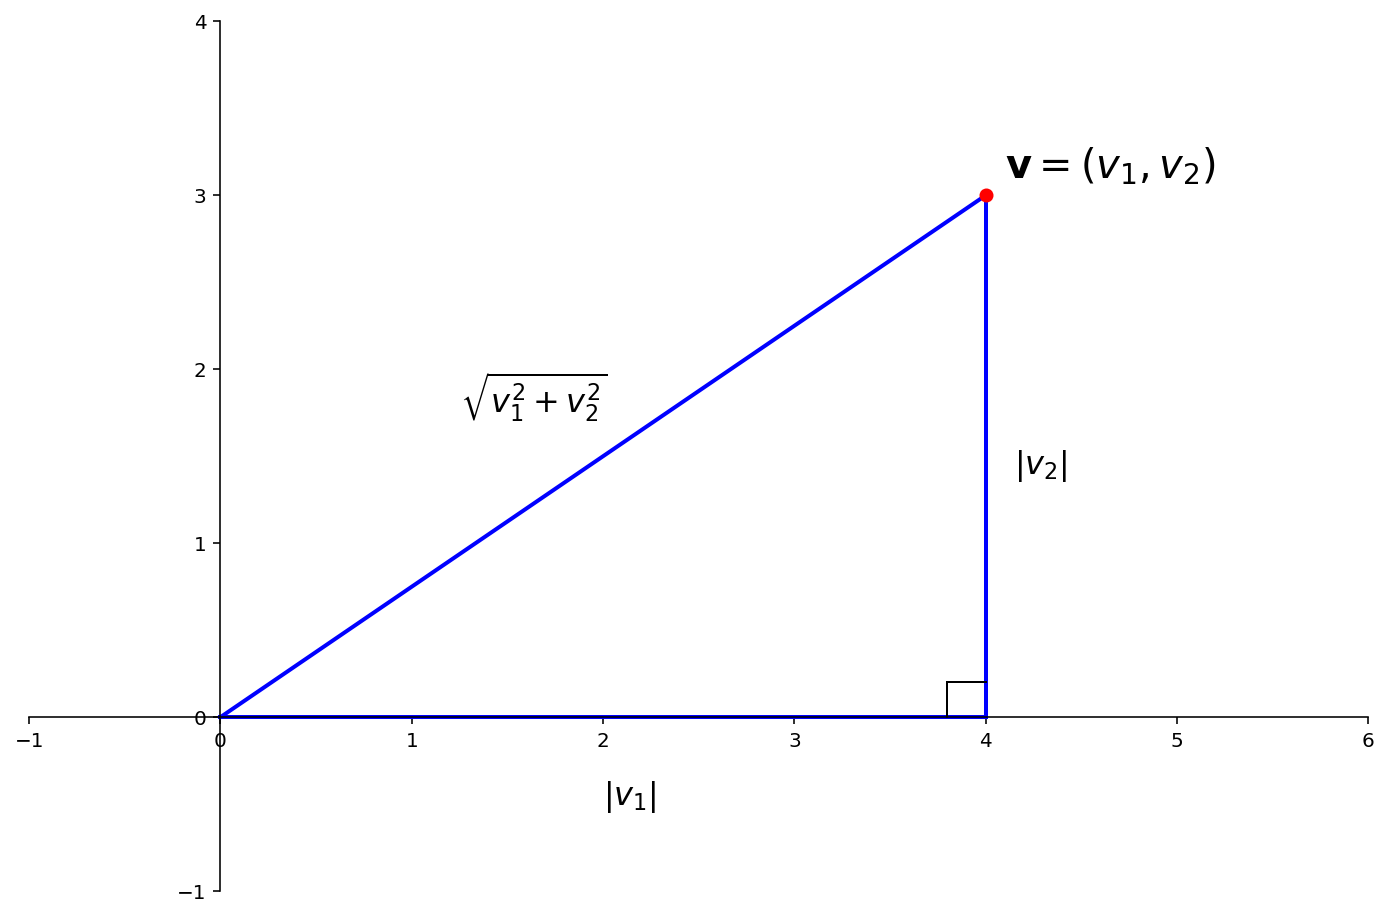

In [133]:
ax = ut.plotSetup(-1,6,-1,4,(12,8))
ut.centerAxes(ax)
pt = [4., 3.]
plt.plot([0,pt[0]],[0,pt[1]],'b-',lw=2)
plt.plot([pt[0],pt[0]],[0,pt[1]],'b-',lw=2)
plt.plot([0,pt[0]],[0,0],'b-',lw=2)
perpline1, perpline2 = ut.perp_sym(np.array([4, 0]), np.array([4, 3]), np.array([0, 0]), 0.2)
plt.plot(perpline1[0], perpline1[1], 'k', lw = 1)
plt.plot(perpline2[0], perpline2[1], 'k', lw = 1)
ut.plotVec(ax,pt)
ax.text(2,-0.5,r'$|v_1|$',size=16)
ax.text(4.15,1.4,r'$|v_2|$',size=16)
ax.text(1.25,1.75,r'$\sqrt{v_1^2+v_2^2}$',size=16)
ax.text(pt[0]+0.1,pt[1]+0.1,r'$\mathbf{v} = (v_1, v_2)$',size=20);

What happens when we move to $\mathbb{R}^3$?

It turns out we need to apply the Pythagorean Theorem an additional time:

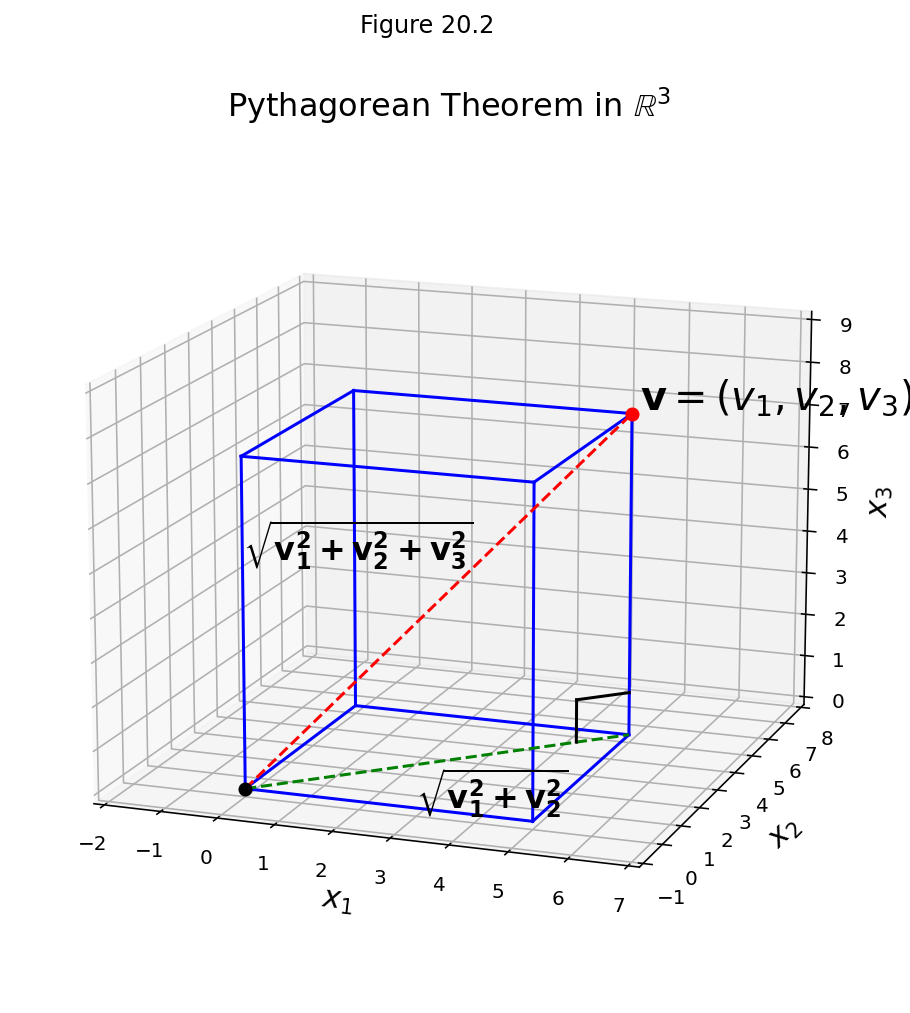

In [257]:
fig = ut.three_d_figure((20, 2), fig_desc = 'Pythagorean Theorem in R3',
                        xmin = 0, xmax = 5, ymin = 0, ymax = 7, zmin = 0, zmax = 9, 
                        figsize = (12, 8), qr = qr_setting)
f = 1.25
v = [4*f,4*f,6*f]
fig.plotCube(v)
fig.text(v[0]+.1, v[1]+.1 ,v[2]+.1, r'${\bf v} = (v_1, v_2, v_3)$', 'v', size=20)
fig.plotLine([[0, 0, 0], [v[0], v[1], 0]], 'g', '--')
fig.plotLine([[0, 0, 0], [v[0], v[1], v[2]]], 'r', '--')
fig.plotPoint(v[0], v[1], v[2], 'r')
fig.plotPoint(0, 0, 0, 'k')
#
fig.plotPerpSym(np.array([v[0], v[1], 0]), np.array([v[0], v[1], v[2]]), np.array([0, 0, 0]), 1)
#
fig.text(-1.25, 3, 4, r'$\bf\sqrt{v_1^2+v_2^2+v_3^2}$', 'sqrt(v1**2 + v2**2 + v3**2)', size=16)
fig.text(3, 0, 0, r'$\bf\sqrt{v_1^2+v_2^2}$', 'sqrt(v1**2 + v2**2)', size=16)
fig.ax.view_init(azim=290, elev = 15)
fig.set_title(r'Pythagorean Theorem in $\mathbb{R}^3$', 'Pythagorean Theorem in R3', size = 16)
fig.save()

So the length of a vector in $\mathbb{R}^n$ is

$$ \sqrt{v_1^2 + v_2^2 + \dots + v_n^2} = \sqrt{\sum_{i=1}^n{v_i}^2}$$

Now let's express this in a way that __does not require writing the individual components__ of $\mathbf{v}$.

We notice that the above expression for the length of $\mathbf{v}$ is the same as:
    
$$\sqrt{\mathbf{v}^T\mathbf{v}}.$$

Notice that this is always defined because $\mathbf{v}^T\mathbf{v}$ is nonnegative.

Length is such a fundamental concept that we introduce a special notation and name for it.

__Definition.__ The __norm__ of $\mathbf{v}$ is the nonnegative scalar $\Vert\mathbf{v}\Vert$ defined by

$$\Vert\mathbf{v}\Vert = \sqrt{\mathbf{v}^T\mathbf{v}} = \sqrt{\sum_{i=1}^n{v_i}^2}.$$

### Normalization to Unit Length 

For any scalar $c$, the length of $c\mathbf{v}$ is $|c|$ times the length of $\mathbf{v}$.  That is,

$$\Vert c\mathbf{v}\Vert = \vert c\vert\Vert\mathbf{v}\Vert.$$

So, for example, $\Vert(-2)\mathbf{v}\Vert = \Vert 2\mathbf{v}\Vert$.

A vector of length 1 is called a __unit vector__.  

If we divide a nonzero vector $\mathbf{v}$ by its length -- that is, multiply by $1/\Vert\mathbf{v}\Vert$ -- we obtain a unit vector $\mathbf{u}$.

We say that we have _normalized_ $\mathbf{v}$, and that $\mathbf{u}$ is _in the same direction_ as $\mathbf{v}.$

__Example.__  Let $\mathbf{v} = \begin{bmatrix}1\\-2\\2\\0\end{bmatrix}.$  Find the unit vector $\mathbf{u}$ in the same direction as $\mathbf{v}.$

__Solution.__  

First, compute the length of $\mathbf{v}$:

$$\Vert\mathbf{v}\Vert^2 = \mathbf{v}^T\mathbf{v} = (1)^2 + (-2)^2 + (2)^2 + (0)^2 = 9$$

$$\Vert\mathbf{v}\Vert = \sqrt{9} = 3$$

Then multiply $\mathbf{v}$ by $1/\Vert\mathbf{v}\Vert$ to obtain

$$\mathbf{u} = \frac{1}{\Vert\mathbf{v}\Vert}\mathbf{v} = \frac{1}{3}\mathbf{v} = \frac{1}{3}\begin{bmatrix}1\\-2\\2\\0\end{bmatrix} = \begin{bmatrix}1/3\\-2/3\\2/3\\0\end{bmatrix}$$

It's important to note that we can't actually visualize $\mathbf{u}$ but we can still reason geometrically about it as a unit vector.

For example, we can talk about (2D) circles, (3D) spheres, four-dimensional spheres, five-dimensional spheres, etc.

## Distance

It's very useful to be able to talk about the __distance__ between two points (or vectors) in $\mathbb{R}^n$.

We can start from basics:

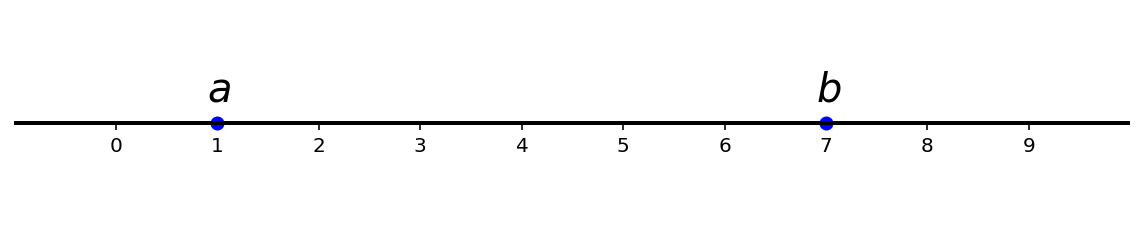

In [178]:
ax = ut.plotSetup(-1,10,-1,1,(10,2))

ut.centerAxes(ax)
from matplotlib.lines import Line2D
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
ax.set_xticks([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
pt1 = [1, 0]
pt2 = [7, 0]
plt.plot(pt1[0], pt1[1],'bo')
plt.plot(pt2[0], pt2[1],'bo')
ax.text(pt1[0]-0.1,0+.2,r'$a$',size=20);
ax.text(pt2[0]-0.1,0+.2,r'$b$',size=20);

On the number line (ie, $\mathbb{R}^1$), the distance between two points $a$ and $b$ is $\vert a-b\vert$. 

The same is true in $\mathbb{R}^n$.

__Definition.__  For $\mathbf{u}$ and $\mathbf{v}$ in $\mathbb{R}^n,$ the __distance between $\mathbf{u}$ and $\mathbf{v}$,__ written as $\mbox{dist}(\mathbf{u},\mathbf{v}),$ is the length of the vector $\mathbf{u}-\mathbf{v}$.  That is,

$$\mbox{dist}(\mathbf{u},\mathbf{v}) = \Vert\mathbf{u}-\mathbf{v}\Vert.$$

This definition agrees with the usual formulas for the Euclidean distance between two points.  The usual formula is

$$\mbox{dist}(\mathbf{u},\mathbf{v}) = \sqrt{(v_1-u_1)^2 + (v_2-u_2)^2 + \dots + (v_n-u_n)^2}.$$

Which you can see is equal to 

$$\Vert\mathbf{u}-\mathbf{v}\Vert = \sqrt{(\mathbf{u}-\mathbf{v})^T(\mathbf{u}-\mathbf{v})} = \sqrt{\begin{bmatrix}u_1-v_1&u_2-v_2&\dots&u_n-v_n\end{bmatrix}\begin{bmatrix}u_1-v_1\\u_2-v_2\\\vdots\\u_n-v_n\end{bmatrix}}$$

There is a geometric view as well. 

For example, consider the vectors $\mathbf{u} = \begin{bmatrix}7\\1\end{bmatrix}$ and $\mathbf{v} = \begin{bmatrix}3\\2\end{bmatrix}$ in $\mathbb{R}^2$.

Then one can see that the distance from $\mathbf{u}$ to $\mathbf{v}$ is the same as the length of the vector $\mathbf{u}-\mathbf{v}$.

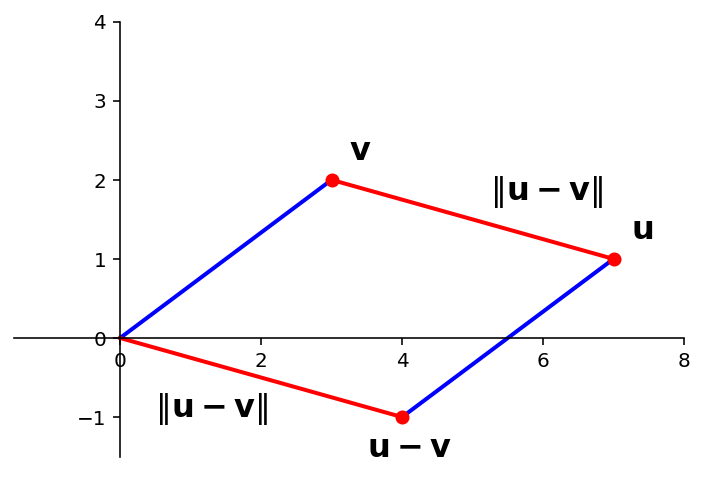

In [22]:
ax = ut.plotSetup(-1.5,8,-1.5,4)
ut.centerAxes(ax)
u = np.array([7., 1])
v = np.array([3., 2])
plt.plot([0,v[0]],[0,v[1]],'b-',lw=2)
ax.text(v[0]+0.25,v[1]+0.25,r'$\bf v$',size=16)
plt.plot([v[0],u[0]],[v[1],u[1]],'r-',lw=2)
ax.text(u[0]+0.25,u[1]+0.25,r'$\bf u$',size=16)
plt.plot([u[0],u[0]-v[0]],[u[1],u[1]-v[1]],'b-',lw=2)
ax.text(u[0]-v[0]-0.5,u[1]-v[1]-0.5,r'$\bf u-v$',size=16)
plt.plot([u[0]-v[0],0],[u[1]-v[1],0],'r-',lw=2)
ut.plotVec(ax,u-v)
ut.plotVec(ax,u)
ut.plotVec(ax,v)
m = (u-v)/2.0
mm = v + m
ax.text(m[0]-1.5,m[1]-0.5,r'$\Vert{\bf u-v}\Vert$',size=16)
ax.text(mm[0]+0.25,mm[1]+0.25,r'$\Vert{\bf u-v}\Vert$',size=16);

This shows that the distance between two vectors is the length of their difference.

``` {toggle}
Question Time!  Q 20.1
```

## Orthogonality

Now we turn to another familiar notion from 2D geometry, which we'll generalize to $\mathbb{R}^n$: the notion of being __perpendicular.__

Once again, we seek a way to express purpendicularity of two vectors, regardless of the dimension they live in.

We will say that two vectors are purpendicular if they form a right angle at the origin.


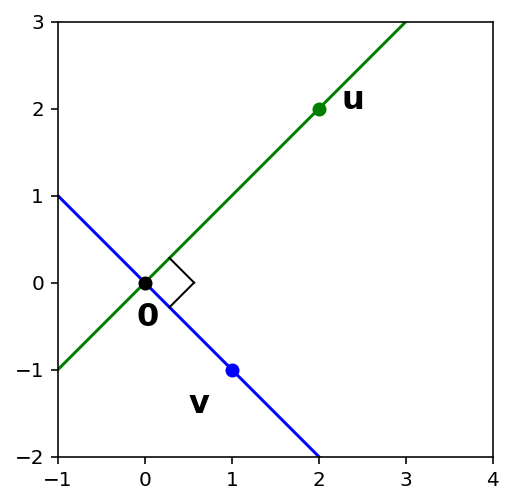

In [258]:
ax = ut.plotSetup(-1,4,-2,3)
ax.set_aspect('equal')
# ut.noAxes(ax)
u = np.array([2, 2])
v = np.array([1, -1])
# v
ut.plotLinEqn(u[0], u[1], 0, '-', 'b')
ut.plotLinEqn(v[0], v[1], 0, '-', 'g')
ax.text(v[0]-0.5,v[1]-0.5,r'$\bf v$',size=16)
ut.plotVec(ax,v,'b')
# u
ut.plotVec(ax,u,'g')
ax.text(u[0]+0.25,u[1],r'$\bf u$',size=16)
# origin
ut.plotVec(ax, np.array([0, 0]), 'k')
ax.text(0-0.1, 0-0.5, r'$\bf 0$', size=16);
# symbol
perpline1, perpline2 = ut.perp_sym(np.array([0, 0]), u, v, 0.4)
plt.plot(perpline1[0], perpline1[1], 'k', lw = 1)
plt.plot(perpline2[0], perpline2[1], 'k', lw = 1);

Draw the line connecting $\mathbf{u}$ and $\mathbf{v}$.

Then $\mathbf{u}$ and $\mathbf{v}$ are purpendicular if and only if they make a right triangle with the origin.

So $\mathbf{u}$ and $\mathbf{v}$ are purpendicular if and only if the Pythagorean Theorem is satisified for this triangle.

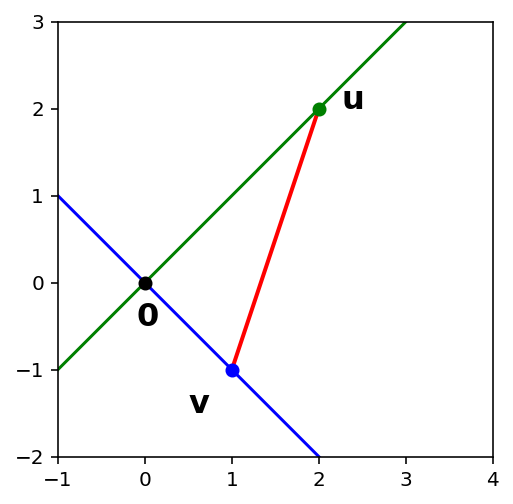

In [241]:
ax = ut.plotSetup(-1,4,-2,3)
ax.set_aspect('equal')
# ut.noAxes(ax)
u = np.array([2, 2])
v = np.array([1, -1])
plt.plot([v[0],u[0]],[v[1],u[1]],'r-',lw=2)
# v
ut.plotLinEqn(u[0], u[1], 0, '-', 'b')
ut.plotLinEqn(v[0], v[1], 0, '-', 'g')
ax.text(v[0]-0.5,v[1]-0.5,r'$\bf v$',size=16)
ut.plotVec(ax,v,'b')
# u
ut.plotVec(ax,u,'g')
ax.text(u[0]+0.25,u[1],r'$\bf u$',size=16)
# origin
ut.plotVec(ax, np.array([0, 0]), 'k')
ax.text(0-0.1, 0-0.5, r'$\bf 0$', size=16);

What is the length of the red side of the triangle?

According to the definitions we've developed today, it is $\Vert \mathbf{u} - \mathbf{v} \Vert$.

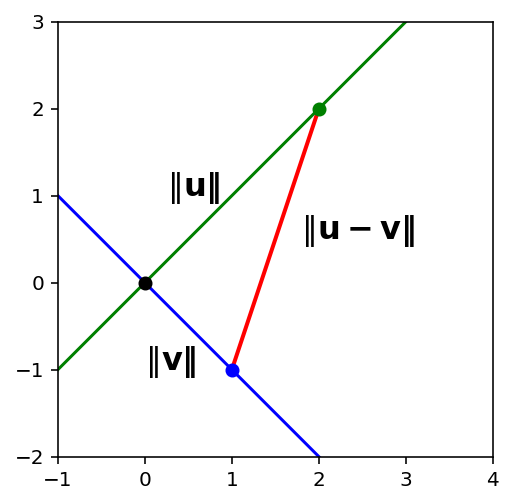

In [248]:
ax = ut.plotSetup(-1,4,-2,3)
ax.set_aspect('equal')
# ut.noAxes(ax)
u = np.array([2, 2])
v = np.array([1, -1])
plt.plot([v[0],u[0]],[v[1],u[1]],'r-',lw=2)
# v
ut.plotLinEqn(u[0], u[1], 0, '-', 'b')
ut.plotLinEqn(v[0], v[1], 0, '-', 'g')
ax.text(v[0]/2-0.5,v[1]/2-0.5,r'$\Vert\bf v\Vert$',size=16)
ut.plotVec(ax,v,'b')
# u
ut.plotVec(ax,u,'g')
ax.text(u[0]/2-.75,u[1]/2,r'$\Vert\bf u\Vert$',size=16)
# origin
ut.plotVec(ax, np.array([0, 0]), 'k')
#
mm = (u + v) / 2
ax.text(mm[0]+0.3,mm[1],r'$\Vert\bf u - v\Vert$',size=16);

So the blue and green lines are purpendicular if and only if:

$$ \Vert \mathbf{u} - \mathbf{v} \Vert^2 = \Vert \mathbf{u} \Vert^2 + \Vert \mathbf{v} \Vert^2$$

Let's see what this implies from an algebraic standpoint. 

First let's simplify the expression for squared distance from $\mathbf{u}$ to $\mathbf{v}$:

$$[\mbox{dist}(\mathbf{u},\mathbf{v})]^2 = \Vert\mathbf{u}-\mathbf{v}\Vert^2$$

$$ = (\mathbf{u}-\mathbf{v})^T(\mathbf{u}-\mathbf{v})$$

$$ = (\mathbf{u}^T-\mathbf{v}^T)(\mathbf{u}-\mathbf{v})$$

$$ = \mathbf{u}^T(\mathbf{u}-\mathbf{v}) - \mathbf{v}^T(\mathbf{u}-\mathbf{v})$$

$$ = \mathbf{u}^T\mathbf{u} - \mathbf{u}^T\mathbf{v} - \mathbf{v}^T\mathbf{u} + \mathbf{v}^T\mathbf{v}$$

Now, remember that inner product is symmetric, ie, $\mathbf{u}^T\mathbf{v} = \mathbf{v}^T\mathbf{u}$, so

$$ = \mathbf{u}^T\mathbf{u} + \mathbf{v}^T\mathbf{v} - 2\mathbf{u}^T\mathbf{v}$$

$$ = \Vert\mathbf{u}\Vert^2 + \Vert\mathbf{v}\Vert^2 - 2\mathbf{u}^T\mathbf{v}$$

So $\mbox{dist}(\mathbf{u},\mathbf{v}) = \mbox{dist}(\mathbf{u},-\mathbf{v})$ if and only if $\mathbf{u}^T\mathbf{v} = 0$.

Now, let's go back to the Pythagorean Theorem.  

$  \mathbf{u}$ and $ \mathbf{v} $ are purpendicular if and only if:

$$ \Vert \mathbf{u} - \mathbf{v} \Vert^2 = \Vert \mathbf{u} \Vert^2 + \Vert \mathbf{v} \Vert^2$$

But we've seen that this means:

$$ \Vert\mathbf{u}\Vert^2 + \Vert\mathbf{v}\Vert^2 - 2\mathbf{u}^T\mathbf{v}= \Vert \mathbf{u} \Vert^2 + \Vert \mathbf{v} \Vert^2$$

So now we can define perpendicularity in $\mathbb{R}^n$:

__Definition.__  Two vectors $\mathbf{u}$ and $\mathbf{v}$ in $\mathbb{R}^n$ are __orthogonal__ to each other if $\mathbf{u}^T\mathbf{v} = 0.$

As you can see, we have introduced a new term for this notion: __orthogonal__.

So when we are referring to vectors, __orthogonal__ means the same thing as __purpendicular__, 

``` {toggle}
Question Time!   Q20.2
```

## The Angle Between Two Vectors

There is an important connection between the inner product of two vectors and the __angle__ between them.

This connection is very useful (eg, in visualizing data mining operations).

We start from the __law of cosines:__

$$ c^2 = a^2 + b^2 - 2ab\cos\theta$$

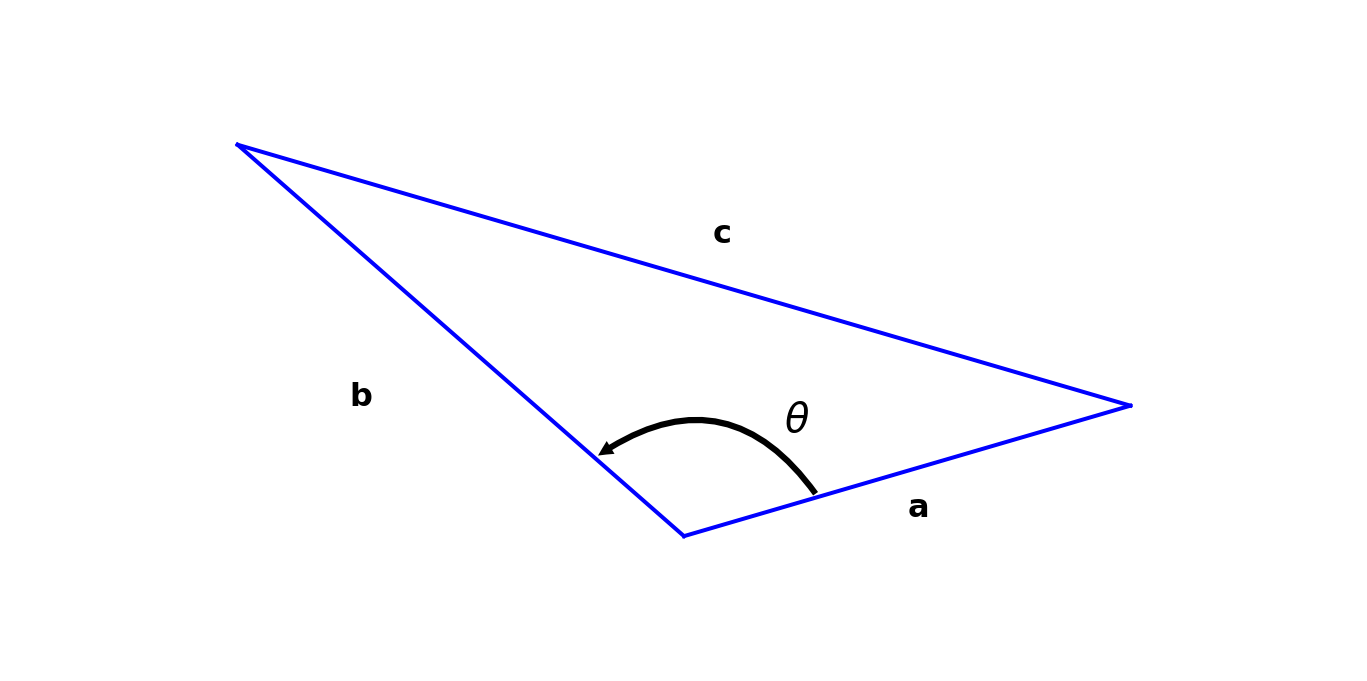

In [25]:
ax = ut.plotSetup(-6,6,-1,4,(12,6))
u = np.array([4.,1])
v = np.array([-4.,3])
pt = u + v
plt.plot([u[0],v[0]],[u[1],v[1]],'b-',lw=2)
plt.plot([0,u[0]],[0,u[1]],'b-',lw=2)
plt.plot([0,v[0]],[0,v[1]],'b-',lw=2)
m = (u-v)/2.0
mm = v + m
ax.text(mm[0]+0.25,mm[1]+0.25,r'${\bf c}$',size=16)
ax.text(2,0.15,r'${\bf a}$',size=16)
ax.text(-3,1,r'${\bf b}$',size=16)
ax.annotate('', xy=(0.2*v[0], 0.2*v[1]),  xycoords='data',
                xytext=(0.3*u[0], 0.3*u[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=0.5'},
                )
ax.text(0.9,0.8,r'$\theta$',size=20)
plt.axis('off');

Now let's interpret this law in terms of vectors $\mathbf{u}$ and $\mathbf{v}$.

Once again, it is the angle that these vectors make at the origin that we are concerned with:


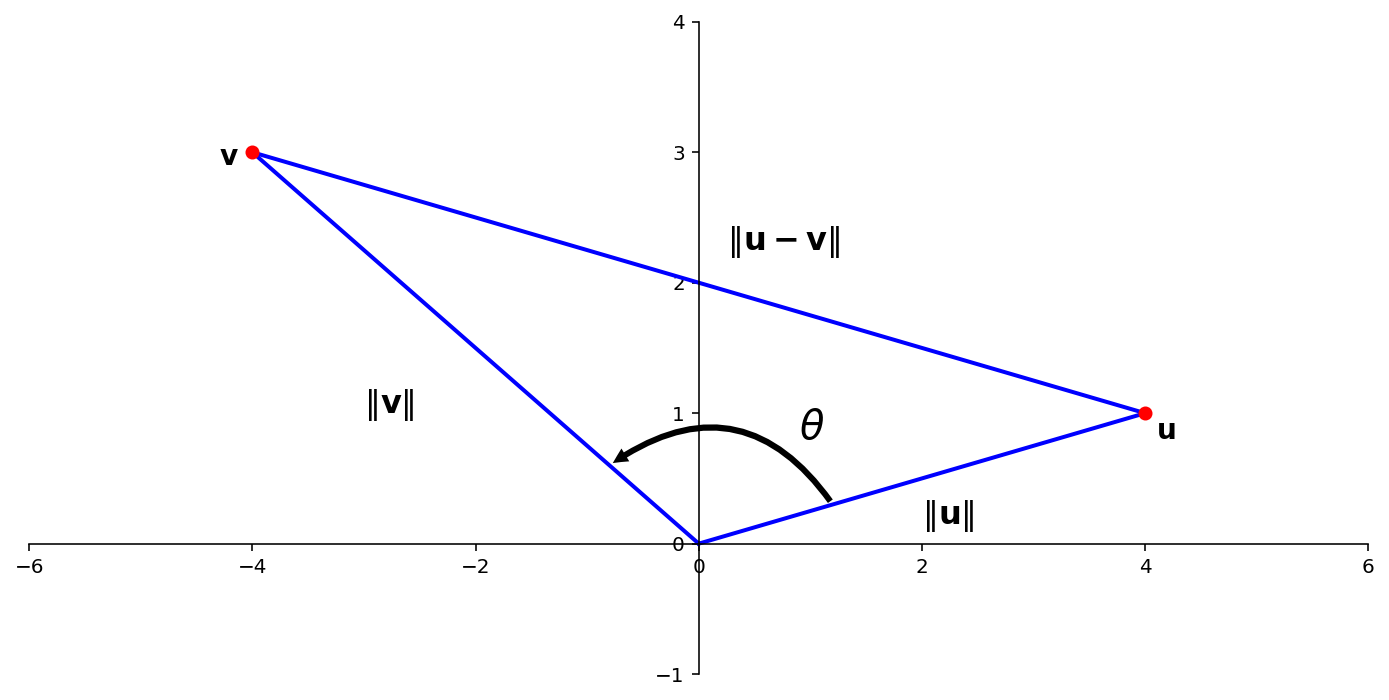

In [253]:
ax = ut.plotSetup(-6,6,-1,4,(12,6))
ut.centerAxes(ax)
u = np.array([4.,1])
v = np.array([-4.,3])
pt = u + v
plt.plot([u[0],v[0]],[u[1],v[1]],'b-',lw=2)
plt.plot([0,u[0]],[0,u[1]],'b-',lw=2)
plt.plot([0,v[0]],[0,v[1]],'b-',lw=2)
ut.plotVec(ax,u)
ut.plotVec(ax,v)
m = (u-v)/2.0
mm = v + m
ax.text(mm[0]+0.25,mm[1]+0.25,r'$\Vert{\bf u-v}\Vert$',size=16)
ax.text(2,0.15,r'$\Vert{\bf u}\Vert$',size=16)
ax.text(-3,1,r'$\Vert{\bf v}\Vert$',size=16)
ax.annotate('', xy=(0.2*v[0], 0.2*v[1]),  xycoords='data',
                xytext=(0.3*u[0], 0.3*u[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=0.5'},
                )
ax.text(4.1, 0.8, r'$\bf u$', size = 14)
ax.text(-4.3, 2.9, r'$\bf v$', size = 14)
ax.text(0.9,0.8,r'$\theta$',size=20);

Applying the law of cosines we get:
    
$$\Vert\mathbf{u}-\mathbf{v}\Vert^2 = \Vert\mathbf{u}\Vert^2 + \Vert\mathbf{v}\Vert^2 - 2\Vert\mathbf{u}\Vert\Vert\mathbf{v}\Vert\cos\theta$$

Now, previously we calculated that:

$$  \Vert\mathbf{u}-\mathbf{v}\Vert^2 = (\mathbf{u}-\mathbf{v})^T(\mathbf{u}-\mathbf{v})$$

$$ = \Vert\mathbf{u}\Vert^2 + \Vert\mathbf{v}\Vert^2 - 2\mathbf{u}^T\mathbf{v}$$

Which means that 
$$ 2\mathbf{u}^T\mathbf{v} = 2\Vert\mathbf{u}\Vert\Vert\mathbf{v}\Vert\cos\theta$$

So 

$$ \mathbf{u}^T\mathbf{v} = \Vert\mathbf{u}\Vert\Vert\mathbf{v}\Vert\cos\theta$$

This is a __very__ important connection between the notion of inner product and trigonometry.

As a quick check, note that if $\mathbf{u}$ and $\mathbf{v}$ are nonzero, and $\mathbf{u}^T\mathbf{v} = 0$, then $\cos\theta = 0.$

In other words, the angle between $\mathbf{u}$ and $\mathbf{v}$ is 90 degrees (or 270 degrees).  So this agrees with our definition of orthogonality.

One implication in particular concerns __unit vectors.__

$$ \mathbf{u}^T\mathbf{v} = \Vert\mathbf{u}\Vert\Vert\mathbf{v}\Vert\cos\theta$$

So 

$$ \frac{\mathbf{u}^T\mathbf{v}}{\Vert\mathbf{u}\Vert\Vert\mathbf{v}\Vert} = \cos\theta$$

$$ \frac{\mathbf{u}^T}{\Vert\mathbf{u}\Vert}\frac{\mathbf{v}}{\Vert\mathbf{v}\Vert} = \cos\theta$$

Note that $\frac{\mathbf{u}}{\Vert\mathbf{u}\Vert}$ and $\frac{\mathbf{v}}{\Vert\mathbf{v}\Vert}$ are unit vectors.

So we have the very simple rule, that for two __unit__ vectors, their inner product is the cosine of the angle between them!

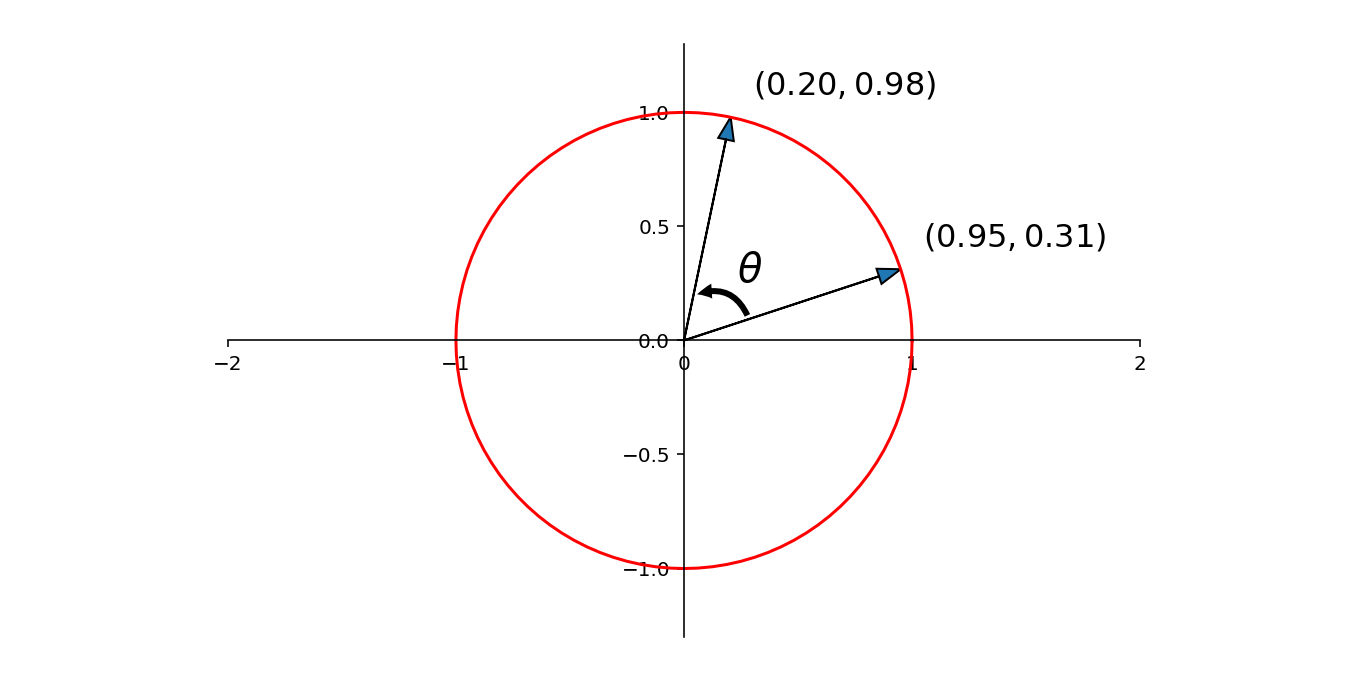

In [27]:
u = np.array([0.95, np.sin(np.arccos(0.95))])
theta = (np.pi/3)+np.arccos(0.95)
v = np.array([np.cos(theta), np.sin(theta)])
ax = ut.plotSetup(-1.3,1.3,-1.3,1.3,(12,6))
ut.centerAxes(ax)
plt.axis('equal')
angles = 2.0*np.pi * np.array(range(101))/100.0
plt.plot(np.cos(angles),np.sin(angles),'r-')
ax.arrow(0,0,u[0],u[1],head_width=0.07, head_length=0.1,length_includes_head = True)
ax.arrow(0,0,v[0],v[1],head_width=0.07, head_length=0.1,length_includes_head = True)
ax.annotate('', xy=(0.2*v[0], 0.2*v[1]),  xycoords='data',
                xytext=(0.3*u[0], 0.3*u[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=0.5'})
mid = 0.4*(u+v)/2.0
ax.text(mid[0],mid[1],r'$\theta$',size=20)
ax.text(u[0]+.1,u[1]+.1,r'$(%0.2f,%0.2f)$'% (u[0],u[1]),size=16)
ax.text(v[0]+.1,v[1]+.1,r'$(%0.2f,%0.2f)$'% (v[0],v[1]),size=16);

Here $\mathbf{u} = \begin{bmatrix}0.95\\0.31\end{bmatrix},$ and $\mathbf{v} = \begin{bmatrix}0.20\\0.98\end{bmatrix}.$

So $\mathbf{u}^T\mathbf{v} = (0.95\cdot 0.20) + (0.31 \cdot 0.98) = 0.5$

So $\cos\theta = 0.5.$

So $\theta = 60$ degrees.

__Example.__ Find the angle formed by the vectors:

$$\mathbf{u} = \begin{bmatrix}1\\3\\-7\\-2\end{bmatrix} \;\;\mbox{and}\;\; \mathbf{v} = \begin{bmatrix}8\\-2\\4\\6\end{bmatrix}$$

__Solution.__

First normalize the vectors:

$$\Vert\mathbf{u}\Vert = \sqrt{1^2 + 3^2 + (-7)^2 + (-2)^2} = 7.93 $$
$$\Vert\mathbf{v}\Vert = \sqrt{8^2 + (-2)^2 + 4^2 + 6^2} = 10.95 $$

So 

$$\frac{\mathbf{u}}{\Vert\mathbf{u}\Vert} = \begin{bmatrix}0.13\\0.38\\-0.88\\-0.25\end{bmatrix}
\;\;\mbox{and}\;\;\frac{\mathbf{v}}{\Vert\mathbf{v}\Vert} = \begin{bmatrix}0.73\\-0.18\\0.36\\0.54\end{bmatrix}$$

Then calculate the cosine of the angle between them:

$$\cos\theta = \frac{\mathbf{u}^T}{\Vert\mathbf{u}\Vert}\frac{\mathbf{v}}{\Vert\mathbf{v}\Vert}$$

$$ = (0.13\cdot0.73)+(0.38\cdot -0.18)+(-0.88\cdot 0.36)+(-0.25\cdot0.54)$$

$$= -0.44$$

Then:

$$\theta = \cos^{-1}(-0.44)$$

$$= 116\;\mbox{degrees.}$$

In [28]:
u = np.array([1.,3,-7,-2])
print (u/np.sqrt(u.T.dot(u)))
v = np.array([8.,-2,4,6])
print(v/np.sqrt(v.T.dot(v)))
print((v/np.sqrt(v.T.dot(v)).T).dot(u/np.sqrt(u.T.dot(u))))
print(180*np.arccos((v/np.sqrt(v.T.dot(v)).T).dot(u/np.sqrt(u.T.dot(u))))/np.pi)

[ 0.12598816  0.37796447 -0.8819171  -0.25197632]
[ 0.73029674 -0.18257419  0.36514837  0.54772256]
-0.4370415209168243
115.91527033906208
